#### Zápis do souboru
Vyhodnoťte funkci sin(x) ve 100 bodech na intervalu [0, 10] a uložte hodnoty x a sin(x) do souboru (např csv).

a) čistý Python

In [6]:
xmin = 0
xmax = 10
N = 100

In [7]:
import math

f = open("data.txt", "w")
for i in range(0, N):
    x = xmin + i*(xmax-xmin)/(N-1)
    y = math.sin(x)
    f.write("%f %f\n"%(x,y))
f.close()

Alternativní způsob práce se souborem

In [8]:
import math

with open("data.csv", "w") as f:
    for i in range(0, 100):
        x = xmin + i*(xmax-xmin)/(N-1)
        y = math.sin(x)
        f.write(f"{x:f} {y:f}\n")

b) s využitím numpy je to o poznání jednodušší

In [9]:
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)
np.savetxt("data.txt", np.vstack((x, y)).T)

#### Čtení ze souboru do pole

Načtěte data uložená v předchozí úloze a vykreslete funkci graficky na obrazovce

a) čistý Python

In [10]:
data = []

f = open("data.csv")
for line in f:
    data.append(list(map(float, line.strip().split(" "))))

b) s využitím numpy

In [11]:
data = np.loadtxt("data.csv")

Vykresleni

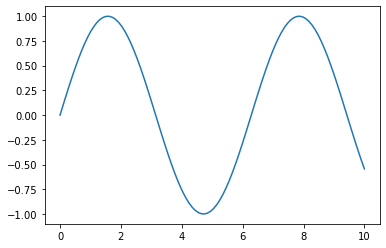

In [13]:
import matplotlib.pyplot as plt
plt.plot(data[:,0], data[:,1])

### Floating point aritmetika

Reprezentace des. čísel ve dvojkové soustavě: vytiskněte číslo 0.1 na 19 desetinných míst

In [14]:
"%.19f"%0.1

'0.1000000000000000056'

Sčítání a odčítání.

Vypočtěte $1+10^{-15}$ a $1+10^{-16}$

In [15]:
1+1e-15

1.000000000000001

In [16]:
1+1e-16

1.0

Kolik desítkových platných míst má float64 s 53-bitovou mantisou?

In [17]:
np.log10(2**53)

15.954589770191003

Výpočty tedy probíhají přibližně s přesností na 16 platných míst. Relativní zaokrouhlovací chyba roste, pokud například počítáme rozdíl dvou podobně velkých čísel:

Vypočtěte $1.001-1$

In [21]:
1.001-1

0.0009999999999998899

Z důvodu zaokrouhlovací chyby také záleží na pořadí aritmetických operací (jsou vyhodnocovány zleva doprava):

Vypočtěte $10^{-15}+1-1$ a $1-1+10^{-15}$

In [22]:
1-1+1e-15

1e-15

In [23]:
1e-15+1-1

1.1102230246251565e-15

Nevhodně navržený algoritmus může vést k "zesilování" chyby. Algoritmus potom je tzv. numericky nestabilní. Viz následující příklad:

Spočítejte členy následující posloupnosti pro $j=1\ldots10$:

$$x_0 = 1$$
$$x_j = (1.01 - x_{j-1})\cdot 100$$

a porovnejte s hodnotami vypočtenými "na papíře"

In [1]:
# ukol 1

#### Sčítání číselných řad

Spočítejte

$$y = \sum_{i=0}^{1000} \frac{1}{10^{-6} + i}$$

 - "popořadě"
 - v obráceném pořadí, tedy od nejmenších členů
 - s využitím knihovních funkce `sum` a `math.fsum`

a porovnejte výsledky

In [231]:
x = np.arange(1001)
y = 1/(1e-6 + x)

popořadě:

In [232]:
s = 0
for i in y: s += i
s

1000007.4854692194

pozpátku:

In [233]:
s = 0
for i in y[::-1]: s += i
s

1000007.4854692166

Vestavěná obecná funkce sum pracuje popořadě. Umí sčítat jakýkoliv objekt s definovanou operací sčítání:

In [184]:
sum(y)

1000007.4854692194

Funkce `math.fsum` je optimální pro přesnost výpočtu. V tomto případě se shoduje se součtem od nejmenších členů:

In [186]:
math.fsum(y)

1000007.4854692166

Funkce `np.sum` je optimalizovaná pro rychlost výpočtu, relativně přesná:

In [185]:
np.sum(y)

1000007.4854692165

Poznámka: exaktní výsledek můžeme snadno ověřit symbolickým výpočtem v knihovně sympy, která umožňuje numerické vyhodnocení sumy s libovolnou přesností. Nejdříve symbolicky definujeme náš výraz:

In [33]:
import sympy as sp
si = sp.Symbol("si")
series = sp.Sum(1/(sp.S(10)**(-6) + si), (si, 0, 1000))
series

Sum(1/(si + 1/1000000), (si, 0, 1000))

a vyhodnotíme s přesností na 30 platných míst. Vidíme, že v tomto případě je sumace "od nejmenších členů" dostatečně přesná.

In [34]:
sp.Sum(1/(sp.S(10)**(-6) + si), (si, 0, 1000)).evalf(30)

1000007.48546921661698028641805

### Porovnávání čísel

Zjistěte, jestli se rovnají čísla:

$1+ 10^{-16}$ a $1$;

$(1.01-1)\cdot100$ a $1$

In [35]:
1+1e-16 == 1

True

In [36]:
1 == (1.01 - 1)*100

False

Vidíme, že z důvodu zaokrouhlovací chyby se mohou shodná čísla jevit jako různá a naopak. Je nutné toto mít na paměti a v případě potřeby použít porovnávání s tolerancí (absolutní a relativní, viz např funkce `np.isclose` a její dokumentace)

In [38]:
def isclose(a, b, rel_tol=1e-9, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

In [39]:
isclose(1, (1.01 - 1)*100)

True

Vhodnější je ale použití knihovních funkcí `np.isclose` nebo `math.isclose`, které zaručují korektní chování s nekonečny a NaN...

In [42]:
np.isclose(1, (1.01 - 1)*100)

True

#### "Speciální" čísla: nula, nekonečno NaN

Poznámka bokem k typům v Pythonu: Python je dynamicky typovaný, takže jméno proměnné není nijak spjato s datovým typem, jako třeba v C/C++. Typ proměnné nebo výrazu můžeme zjistit příkazem `type`

In [43]:
x = 0
type(x)

int

In [44]:
x = 0.0
type(x)

float

A ještě jedna trochu záludná poznámka k typům čísel v Pythonu: spočtěte `1/0` a `1/np.sin(0)`. Proč se výsledky liší?

In [61]:
1/0

ZeroDivisionError: division by zero

In [62]:
1/np.sin(0)

<ipython-input-62-21b4b538a0f5>:1: RuntimeWarning: divide by zero encountered in double_scalars
  1/np.sin(0)


inf

Je to typem čísel, zkuste type(0), type(0.0) a type(np.sin(0)

In [63]:
type(0)

int

In [64]:
type(0.0)

float

In [65]:
type(np.sin(0))

numpy.float64

Problém je v různých typech float čísel. Numpy float umožňuje dělení nulou. Pouze generuje varování a korektně vrací hodnotu inf. Toto chování numpy lze nastavit.

64-bitový nulový numpy float můžete vytvořit příkazem `np.float64(0)` a tento datový typ dokáže reprezentovat i speciální hodnoty NaN (not a number, nedefinovaný výraz), +inf, -inf (nekonečna), +0, -0 (nula se znaménkem)

In [60]:
-np.float64(0), np.nan, -np.inf, np.inf

(-0.0, nan, -inf, inf)

Ukázka některých výpočtů s NaN a inf hodnotami:

In [52]:
1/np.float64(0), -1/np.float64(0)

<ipython-input-52-18dbe72427c2>:1: RuntimeWarning: divide by zero encountered in double_scalars
  1/np.float64(0), -1/np.float64(0)


(inf, -inf)

In [53]:
0/np.float64(0)

<ipython-input-53-f117ac9e30c2>:1: RuntimeWarning: invalid value encountered in double_scalars
  0/np.float64(0)


nan

NaN dle definice není větší, menší, ani rovno žádnému číslu:

In [66]:
np.nan > 3, np.nan <= 3, np.nan == np.nan

(False, False, False)

In [67]:
np.inf == np.inf

True

In [68]:
-np.float64(0) == np.float64(0)

True

In [69]:
np.arctan(np.inf)/np.pi

0.5

### Hledání kořenů

Naprogramujte hledání kořenů metodou půlení intervalu.

Najděte kořen sin(x) mezi 3 a 4 metodou půlení intervalu

In [73]:
a, b = 3, 4
f = np.sin

In [101]:
def bisect(f, a, b, maxiter=53):
    # ukol 2: definujte tělo této funkce

In [103]:
bisect(f, 3, 4)

3.141592653589793

Newtonova metoda

In [149]:
def newton(f, df, a):
    for i in range(10):
        a_new = a - f(a)/df(a)
        if a_new == a:
            return a
        a = a_new

In [70]:
df = np.cos

In [155]:
newton(f, df, 4.8)

15.707963267948966

### Minimalizace

Newtonova metoda


In [157]:
def newton_min(f, df, ddf, a):
    for i in range(10):
        a_new = a - df(a)/ddf(a)
        if a_new == a:
            if ddf(a) > 0:
                return a
            else:
                raise(RuntimeError("Method did not converge to minimum"))
        a = a_new

In [162]:
def f(x): return x**2 + x
def df(x): return 2*x + 1
def ddf(x): return 2

In [163]:
newton_min(f, df, ddf, 1)

-0.5

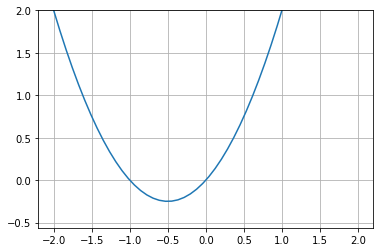

In [168]:
x = np.linspace(-2, 2)
plt.plot(x, f(x))
plt.ylim(ymax=2)
plt.grid()